# 인공 신경망

## MNIST : 손글씨 분류
- mnist 데이터는 훈련데이터와 테스트 데이터를 튜플 형식으로 나누어서 반환함
    - load할때 변수별로 나눠 받아주는 것이 편하다

In [5]:
# !pip install tensorflow

In [1]:
from tensorflow import keras
from keras.datasets import mnist

In [2]:
(train_input, train_target), (test_input, test_target) = (x_train, y_train), (x_test, y_test) = mnist.load_data()

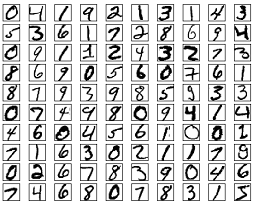

In [3]:
# 28*28 픽셀 이미지
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [4]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


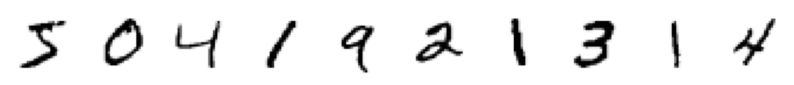

In [5]:
import matplotlib.pyplot as plt
# 이미지 확인
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap = 'Greys')
    axs[i].axis('off')
plt.show()

In [8]:
print([y_train[i] for i in range(10)])

[5, 0, 4, 1, 9, 2, 1, 3, 1, 4]


In [9]:
import numpy as np
# target 데이터 카테고리별 갯수 및 수치 확인
print(np.unique(y_train, return_counts = True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))


#### mnist 타겟 값
- [0,1,2,3,4,5,6,7,8,9]

## 로지스틱 회귀로 손글씨 분류하기

In [10]:
# 흑백 이미지이므로 255로 나누어서 숫자 범위를 줄임
train_scaled = train_input / 255.0
# 2차원 이미지를 1차원 벡터로 변환
train_scaled = train_scaled.reshape(-1, 28*28)

In [11]:
print(train_scaled.shape)

(60000, 784)


In [12]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
import numpy as np
# max_iter=5 반복횟수
sc = SGDClassifier(loss = 'log_loss', max_iter = 5, random_state = 42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs = -2)

In [14]:
# 학습 정확도는 89.1% 정도
print(scores)
print(np.mean(scores['test_score']))

{'fit_time': array([4.48615909, 4.49517298, 4.41428566, 4.48512435, 4.5164423 ]), 'score_time': array([0.02909541, 0.02652884, 0.02854204, 0.02710247, 0.0217247 ]), 'test_score': array([0.89725   , 0.885     , 0.88408333, 0.88425   , 0.909     ])}
0.8919166666666666


In [11]:
# 이미지 픽셀 수
28*28

784

### 로지스틱 회귀 식
- 회귀 알고리즘이므로 회귀계수를 구해 각 결정값을 만들어낸다
- z_1 = w1 * 픽셀1 + w2 * 픽셀2 + ..... + w784 * 픽셀784 + b
    - 10개의 분류이므로 10개의 방정식이 생성되고 10개 방정식에 대해 모든 데이터를 적용하여 각 결정값의 확률을 찾아냄
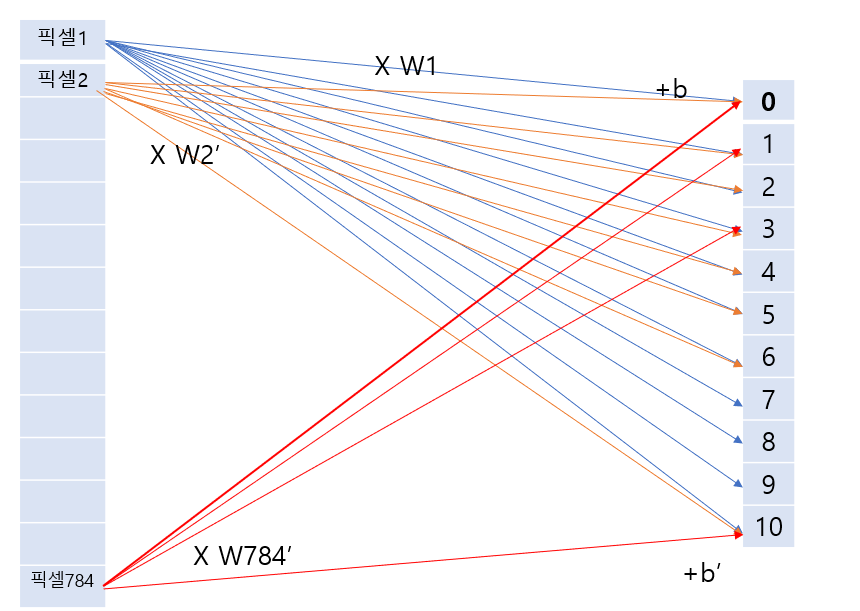 

## 인공신경망
- 확률적 경사하강법을 사용하는 로지스틱 회귀와 같다
- z값(결정값)을 계산하는 단위를 뉴런 또는 유닛이라고 함
    - 이 값을 바탕으로 클래스를 예측하기때문에 출력층 이라고도 부름
- 이미지의 각 픽셀을 입력층이라고 부름
    - 입력층은 픽셀 자체이고 특별한 계산을 수행하지는 않는다
- 출력층 Zi를 만들기 위해서 픽셀 1(X1)에 곱해지는 가중치는 W1_1, 픽셀 2(X2)에 곱해지는 가중치는 W1_2 픽셀 784에 곱해지는 가중치는 W1_3라고 표기한다
- 절편은 뉴런마다 하나씩임
- 인공 뉴런을 그림으로 표현하면 모양이 생물학적 뉴런과 비슷
    - 모양이 비슷하여 뉴런이라고 이름 하였고,  새로운 머신러닝 기법 임
        - 즉 머신러닝의 개념을 차출하여 네트워크를 구성한 알고리즘임

### 텐서플로와 케라스
- 인공신경망은 로지스틱회귀와 비슷하지만 로지스틱회귀가 제공하지 않는 몇가지 기능을 더 갖고 있음
- 케라스는 텐서플로의 고수준 API임
    - 딥러닝 라이브러리는 GPU 사용이 가능
    - 케라스는 GPU 연산을 수행하는 백엔드 라이브러리를 사용함(텐서플로)

In [18]:
import tensorflow as tf

In [19]:
from tensorflow import keras

## 인공신경망으로 모델 만들기

- 머신 러닝은 교차검증을 사용해 모델을 평가했지만 딥러닝은 검증 데이터를 따로 덜어내어 사용함
    - 딥러닝의 데이터는 충분히 크기때문에 검증 검수가 안정적임
    - 교차 검증을 수행하기에는 시간이 너무 오래 걸리기 때문에 딥러닝에서는 활용하지 않는다

In [20]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [21]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [22]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


- 인공신경망 오른쪽을을 생성(첫번째 층)
    - 10개의  손글씨를 구별하기 위해 10개의 뉴런(unit)으로 구성
    - softmax 함수(숫자를 0~1사이의 값으로 변경해 주는)를 통해 각 아이템의 비율을 계산
    - 총 몇개의 입력이 들어오는지 정보를 넣어줘야 함
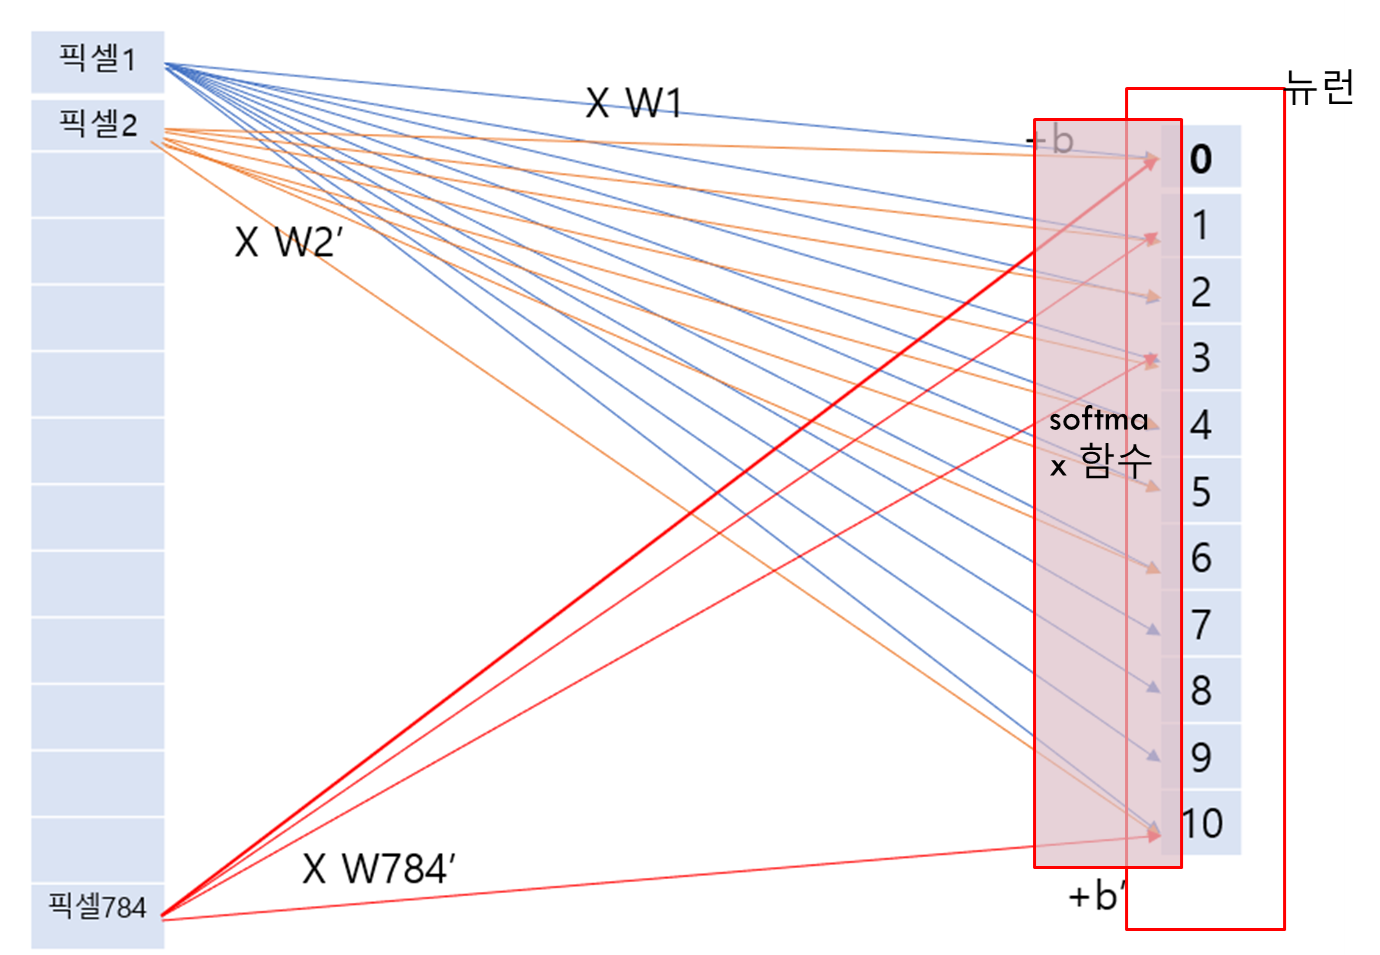

- 밀집층
    - 케라스에는 다양한 층이 준비되어 있음
    - 밀집층은 784 * 10으로 연결되어 빽빽한 연결선이 있어 밀집층이라고 함
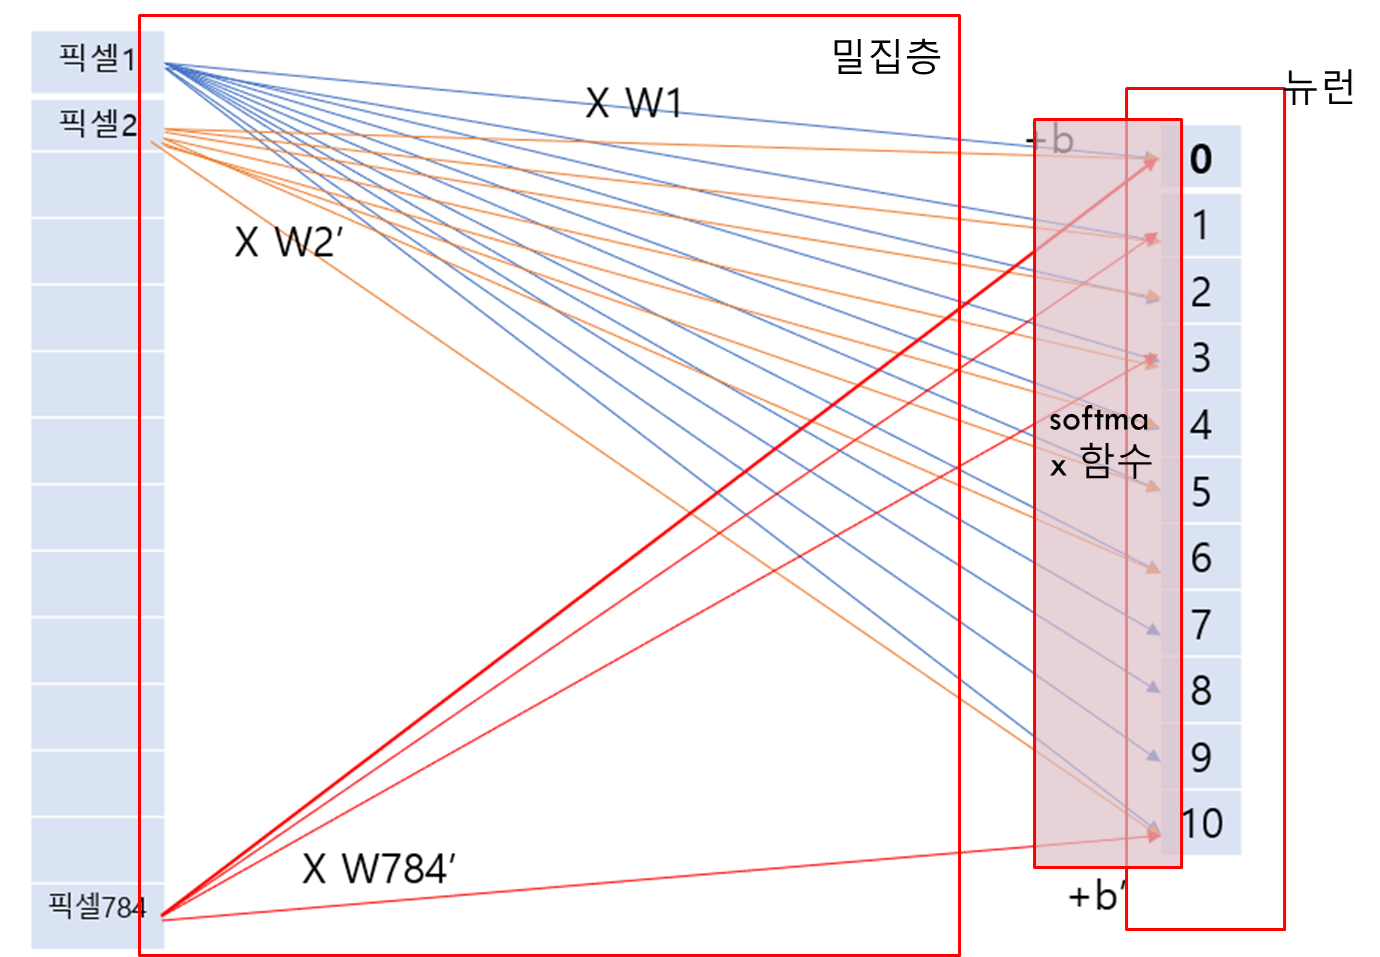
- 절편은 뉴런마다 더해짐

## 케라스 모델 구성
- 밀집층 생성을 위한 기본 모델 모양 구성
    - Dense 클래스 사용
    - Dense(출력층 수,activation=확률활성화함수, input_shape= 입력크기)
- 뉴런갯수, 뉴런 출력에 적용할 활성화함수, 입력의 크기를 파라미터로 사용함
- 10개의 출력값을 확률값으로 바꾸기 위해 activation=softmax 함수를 사용
    - 다중분류 : softmax , 이진분류 : sigmoid
- 밀집층 생성
    - Sequential 클래스 이용 : 구성정보를 담고 있는 dense 클래스 객체를 파라미터로 전달
    - model = Sequential(모델기본모양객체:dense)
    - model이 신명망모델 객체임 : 이 객체 인스턴스를 이용해 작업

In [19]:
# 1개의 층이 있는 모델 구성 : 1개의 층만 있으면 출력층이므로 unit수는 분류 범주와 동일해야 함
# 밀집층 생성을 위한 기본 모델 모양 구성
# 10개중 하나로 분류해야하므로 출력층의 unit은 10개 여야 함
keras.layers.Dense(10, activation = 'softmax', input_shape = (784,))

In [31]:
# 밀집층 생성
# Sequential 클래스 이용 : 구성정보를 담고 있는 dense 클래스 객체를 파라미터로 전달
model = keras.Sequential(dense)
# model 객체변수가 신경망 모델임

NameError: name 'dense' is not defined

- 위 코드로 인해 신경망 모델이 만들어짐
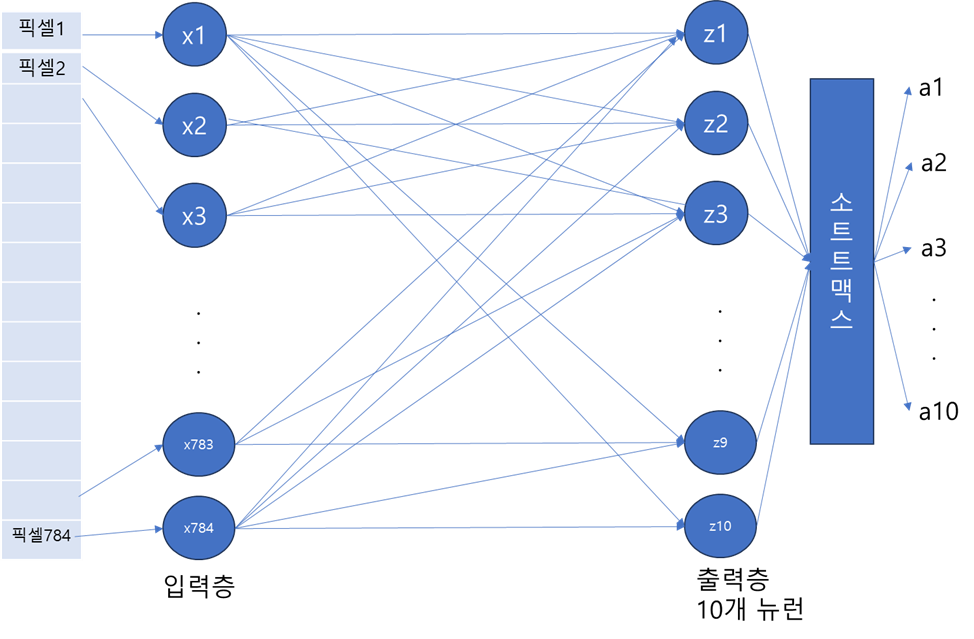

## 인공신경망으로 손글씨 아이템 분류하기
- 훈련전에 설정 단계가 있음
    - MODEL.compile(loss=손실함수,metrics=평가방법)
    - 손실함수란? 어떤 문제에 대해 머신러닝(딥러닝)이 얼마나 잘못되고 있는지를 측정하는 기준
        - 값이 작을수록 좋지만 최솟값인지는 알지 못함
        - 가능한 많이 찾아보고 만족할만한 수준이라면 최소값이라고 인정하고 종료해야 함
        - 대부분 문제에서 다루는 손실함수들은 이미 정의되어 있는 경우가 많음
            - 이진분류 : binary-crossentropy
            - 다중분류 : categorical-crossentropy
    - 손실함수는 정답(y(타깃값))와 예측(^y)를 입력으로 받아 실수값 점수를 만드는데, 이 점수가 높을수록 모델이 안좋은 것

**손글씨1 샘플에 대하여**
- 이진분류 형태처럼 계산(크로스엔트로피)
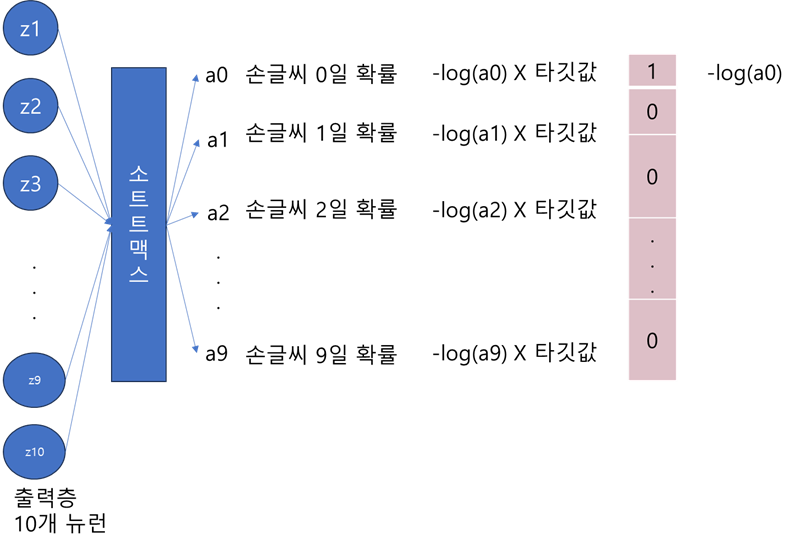
- 출력층은 10개의 뉴런이 있고 10개의 클래스에 대한 확률을 출력
    - 첫번째 출력 :손글씨 0일 확률, 두번째 출력 : 손글씨 1일 확률 ...
    - 타깃에 해당하는 확률만 남겨놓기 위해서는 나머지 확률에는 모두 0을 곱해줘야 함
    - 신경망은 손글씨 0 샘플에서 손실을 낮추려면 첫번째 뉴런의 활성화 출력 a1이 값을 가능한 1에 가깝게 만들어야 함

In [28]:
# 샘플이 손글씨 0일 확률이 0.6 이고 이 샘플의 분류값은 손글씨 0이라면
# -log(0.6)*1이 계산됨
import numpy as np

# 손실값은 0.5

0.5108256237659907

In [29]:
# 다음 층에서 다시 계산했을 때
# 샘플이 손글씨 0일 확률이 0.7 이고 이 샘플의 분류값은 손글씨 0이라면
# -log(0.7)*1이 계산됨
import numpy as np

# 손실값은 0.35

0.35667494393873245

- 위와 같이 손실값이 점점 작아짐
- 이렇게 반복이 모두 마무리 되고 최종적으로

- 샘플이 손글씨 1일 확률이 0.3이고 이 샘플의 분류값(정답)은 손글씨 0이라면 손글씨 1일 확률은 0으로 곱해 계산되어져 사라짐
- -log(0.3)*0 이 계산되므로 사라짐
- 즉 **손실함수는 각 타겟에 대하여 모델이 예측한 확률값을 받아서 해당 타겟의 예측에 대한 손실값만 남기고 나머지는 제거해야 함**
    - 그래서 손실함수 계산 시 타겟 데이터의 형태는 one-hot encoding 형태여야 한다


**원-핫 인코딩 형태**
- 크로스 엔트로피를 다중분류에서 쓰려면 원-핫 인코딩형태로 변형해야 함
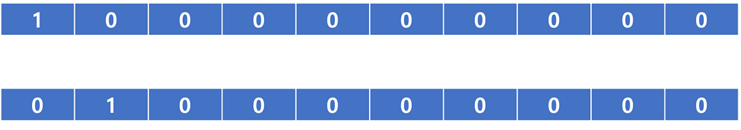
- mnist의 타겟값은 0~9 까지의 정수
    - 원-핫 인코딩개념을 적용하여 손실값을 계산해주는 계산방법이   sparse_categorical_crossentropy 임

In [23]:
# 다중분류이므로 'sparse_categorical_crossentropy'를 사용
model.compile(loss = 'sparse_categorical_corssentropy', metrics = 'accuracy')

NameError: name 'model' is not defined

In [24]:
print(train_target[:10])

[5 0 4 1 9 2 1 3 1 4]


In [25]:
# epochs : 반복 훈련 횟수
model.fit(train_scaled, train_target, epochs = 5)
# 학습평가점수
# 92%가 넘음

NameError: name 'model' is not defined

**tip. 텐서플로와 같은 딥러닝 라이브러리는 인공신경망을 만들고 훈련할 때 랜덤하게 동작하는 특성이 있어 결과가 다 다를 수 있음**
- 모델이 최적점에 안전하게 수렴한다면 일반적으로 이 차이는 크지 않다

In [27]:
x_test_scal = x_test/255.0
x_test_scal = x_test_scal.reshape(-1, 28*28)

In [28]:
# 검증세트로 모델의 성능을 확인(성능평가 : evaluate())
model.evaluate(x_test_scal, y_test)
# 훈련세트보다 조금 높아짐

NameError: name 'model' is not defined

## 개념 정리

### (1) 모델 설정
딥러닝의 구조와 층을 설정하는 단계  
network = Sequential()   
network.add(Dense(512, activation='relu', input_shape=(28 * 28,)))   
network.add(Dense(10, activation='softmax'))    

두 개의 층을 가진 모델  
- 조밀하게 연결된 (또는 완전 연결된) 신경망 층인 Dense 층 2개가 연속되어 있음  
- 각 층은 가중치 텐서를 포함하여 입력 데이터에 대한 몇 개의 간단한 텐서 연산을 적용함
- 층의 속성인 가중치 텐서는 네트워크가 정보를 저장하는 곳임

맨 마지막 층은 결과를 출력하는 '출력층'  
나머지는 모두 '은닉층'의 역할  
각층은 Dense() 함수를 통해 구체적으로 구조가 결정됨  
- 이 층에 만드는 노드 수 : 512  
- 활성화 함수 : activation='relu', activation='softmax'  

두 번째 (즉, 마지막) 층은 10개의 확률 점수가 들어 있는  
배열(모두 더하면 1입니다)을 반환하는 소프트맥스 층  
각 점수는 현재 숫자 이미지가 10개의 숫자 클래스 중 하나에 속할 확률      
    
relu 함수
- 시그모이드 함수 대안으로 떠오르며 현재 가장 많이 사용되는 활성화 함수
- x가 0보다 작을 때는 모든 값을 0으로 처리하고
- 0보다 클 때는 x를 그대로 사용하는 방법
- 이 방법을 쓰면 x가 0보다 크기만 하면 미분값이 1이 되고
- 여러 은닉층을 거치며 곱해지더라도 맨 처음 층까지 사라지지 않고 남아 있을 수 있음
- 이 간단한 방법이 여러 층을 싸을 수 있게 함으로써
- 딥러닝 발전에 속도가 붙게 되었음
- (참고 : 이후 렐루의 0이 되는 순간을 완화한 소프트플러스(softplus) 함수등  
  렐루를 변형한 함수도 개발 중으로, 더 나은 활성화 함수를 만들기 위한 노력 진행 중)

softmax 함수
- 3개 이상으로 분류하는 다중 클래스 분류에서 사용하는 활성화 함수
- 분류된 클래스가 n개일 경우, n차원의 벡터를 입력받아 각 클래스에 속할 확률 추정
- 시그모이드 함수는 이진 분류에서 주로 사용되며 보통 출력층에서만 사용

딥러닝의 층
- 입력층
- 은닉층
- 출력층


### (2) 컴파일  
생성된 모델을 컴퓨터가 이해할 수 있도록 컴파일하는 단계  
network.compile(optimizer='rmsprop',  
                loss='categorical_crossentropy',  
                metrics=['accuracy'])  

신경망이 훈련 준비를 마치기 위해서 컴파일 단계에 포함될 세 가지가 더 필요  

손실 함수 (loss)
- 훈련 데이터에서 신경망의 성능을 측정하는 방법으로 
- 네트워크(모델)가 옳은 방향으로 학습될 수 있도록 도와 줌
- categorical_crossentropy 
    - 가중치 텐서를 학습하기 위한 피드백 신호로 사용되며 훈련하는 동안 최소화됨
    - 미니 배치 확률적 경사 하강법을 통해 손실이 감소됨
    - 경사 하강법을 적용하는 구체적인 방식은 
    - 첫 번째 매개변수로 전달된 rmsprop 옵티마이저에 의해 결정됨



### (3) 모델 실행 (학습)  
케라스에서는 fit() 메서드를 호출하여 학습 데이터에 모델을 학습  
network.fit(train_images, train_labels, epochs=5, batch_size=128)


fit 메서드 호출 후 수행되는 작업
- 네트워크(모델)가 128개 샘플씩 미니 배치로 학습 데이터를 다섯 번 반복함
- (전체 훈련 데이터에 수행되는 각 반복을 에포크(epoch)라고 함)
- 각 반복마다 네트워크(모델)가 배치에서 손실에 대한 가중치의 그래디언트를 계산하고 
- 그에 맞추어 가중치를 업데이트함
- 다섯 번의 에포크 동안 네트워크는 2,345번의 그래디언트 업데이트를 수행할 것임
    - 학습 샘플 60,000개를 128개 배치로 나누면 469 배치가 만들어 지고
    - 에포크마다 469번으로 총 469 X 5 = 2,345
    - 네트워크의 손실이 충분하게 낮아져서 높은 정확도로 손글씨 숫자를 구분할 수 있을 것임

### (4) 모델 평가 (결과 출력)  
           
학습하는 동안 두 개의 정보가 출력
- 학습 데이터에 대한 네트워크의 손실과 정확도
- loss: 0.0665 
- accuracy: 0.9798